## Project 2: What are the best predictors of malaria at the household level?

In this project I look at the DHS of Uganda. The DHS has demographic and health information at the individual level.

I am trying to see how household level factors like source of drinking water, source of latrine, ownership of cattle etc, help in predicting if the result of the malaria test is positive. The description of the variables (just X and Y) is as follows:

X :

upr_source: Unprotected source of drinking water

upr_lat: Unprotected source of latrine

roof: Concrete roof

wall: Concrete wall

floor: Concrete floor

hv219: sex of head of household

hv227: whether respondent has bednet for sleeping

hv270: wealth quintile

hml1: number of people who sleep under one bed net

hml2: type of net respondent slept in last night

hml7: brand of net

shmlweight: malaria sample weight

sh120b: Community health worker present

sh120c: Community health worker distributed malaria medicine

hc53: haemoglobin level

Y:

hml35: result of rapid malaria test


The way this project is done as follows:-

##### PART 1: Exploratory Data Analysis

##### PART 2: Regularization

##### PART 3: Prediction Accuracy

# PART 1

In [440]:

#PART 1: IMPORTING DATA, DIVIDE SAMPLE INTO RURAL AND URBAN, MAKE DUMMIES FOR CATEGORUCAL VARIABLES


# STEP 1: Importing the data modules needed for the analysis, plotting and showing results

import numpy as np
import scipy.stats as stats
from scipy.stats.stats import pearsonr
import pandas as pd

#plotting modules

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [441]:
uganda = pd.read_stata('/Users/meyhar/Documents/CourseWork/Spring 2017/Metrics/UGPR72FL.dta')

In [442]:
uganda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22954 entries, 0 to 22953
Columns: 220 entries, hhid to sh228
dtypes: category(160), float64(28), int16(7), int32(3), int8(19), object(3)
memory usage: 10.1+ MB


In [443]:
uganda.describe().T

,count,mean,std,min,25%,50%,75%,max
hvidx,22954.0,3.928074,2.658706,1.0,2.0,3.0,5.0,21.0
hv001,22954.0,107.404461,57.687911,1.0,61.0,107.0,155.0,210.0
hv002,22954.0,49.026923,40.642068,1.0,19.0,40.0,70.0,478.0
hv004,22954.0,107.404461,57.687911,1.0,61.0,107.0,155.0,210.0
hv005,22954.0,975741.695565,532893.375000,106375.0,590788.0,908373.0,1187392.0,3542943.0
hv006,22954.0,7.985580,5.290705,1.0,1.0,12.0,12.0,12.0
hv007,22954.0,2014.365427,0.481560,2014.0,2014.0,2014.0,2015.0,2015.0
hv008,22954.0,1380.370698,0.493796,1380.0,1380.0,1380.0,1381.0,1382.0
hv009,22954.0,6.856147,3.115118,1.0,5.0,7.0,9.0,21.0
hv010,22954.0,1.317330,0.904843,0.0,1.0,1.0,2.0,5.0


In [444]:
#Malaria predictors might be different for rural and urban households. Therefore, I Classify households into rural and urban

urban_uganda=uganda[uganda['hv025']=='urban']

In [445]:
rural_uganda= uganda[uganda['hv025']=='rural']

In [446]:
urban_uganda.describe().T

,count,mean,std,min,25%,50%,75%,max
hvidx,3811.0,3.501968e+00,2.440189,1.0,2.0,3.0,5.0,17.0
hv001,3811.0,7.428287e+01,69.342236,1.0,12.0,47.0,140.0,209.0
hv002,3811.0,6.944188e+01,60.403312,1.0,27.0,55.0,97.0,478.0
hv004,3811.0,7.428287e+01,69.342236,1.0,12.0,47.0,140.0,209.0
hv005,3811.0,1.037546e+06,657253.062500,227246.0,577996.0,893775.0,1188470.0,3542943.0
hv006,3811.0,8.758594e+00,5.015512,1.0,1.0,12.0,12.0,12.0
hv007,3811.0,2.014295e+03,0.455956,2014.0,2014.0,2014.0,2015.0,2015.0
hv008,3811.0,1.380295e+03,0.455956,1380.0,1380.0,1380.0,1381.0,1381.0
hv009,3811.0,6.003936e+00,3.016531,1.0,4.0,6.0,7.0,17.0
hv010,3811.0,1.447127e+00,1.061631,0.0,1.0,1.0,2.0,5.0


In [447]:
rural_uganda.describe().T

,count,mean,std,min,25%,50%,75%,max
hvidx,19143.0,4.012903,2.692120,1.0,2.0,3.0,6.0,21.0
hv001,19143.0,113.998328,52.645131,17.0,69.0,114.0,156.0,210.0
hv002,19143.0,44.962702,33.984304,1.0,18.0,38.0,65.0,213.0
hv004,19143.0,113.998328,52.645131,17.0,69.0,114.0,156.0,210.0
hv005,19143.0,963437.687771,503607.250000,106375.0,609411.0,908396.0,1186274.0,3332342.0
hv006,19143.0,7.831688,5.330561,1.0,1.0,12.0,12.0,12.0
hv007,19143.0,2014.379512,0.485278,2014.0,2014.0,2014.0,2015.0,2015.0
hv008,19143.0,1380.385833,0.499620,1380.0,1380.0,1380.0,1381.0,1382.0
hv009,19143.0,7.025806,3.106672,1.0,5.0,7.0,9.0,21.0
hv010,19143.0,1.291490,0.867983,0.0,1.0,1.0,2.0,5.0


In [448]:
#First, we look at malaria predictors for subsample for rural households.
#I do basic summary statistics of household characteristics

rural_uganda.drop(['shwlthfu'], axis=1, inplace=True)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [449]:
#Males are head of household for most households

rural_uganda['hv219'].describe()

count     19143
unique        2
top        male
freq      14772
Name: hv219, dtype: object

In [450]:
#Main floor material for rural households is sand

rural_uganda['hv213'].describe()

count          19131
unique             8
top       earth/sand
freq            8452
Name: hv213, dtype: object

In [451]:
#Main wall material is mud

rural_uganda['hv214'].describe()

count             19066
unique               14
top       mud and poles
freq               6834
Name: hv214, dtype: object

In [452]:
#Main roof material is iron sheets

rural_uganda['hv215'].describe()

count           19131
unique             11
top       iron sheets
freq             9522
Name: hv215, dtype: object

In [453]:
#We see that most rural households have a bed-net under which they can sleep. Bed nets are the most cheap household tool to preven the risk of malaria.

rural_uganda['hv227'].value_counts()

yes    18407
no       736
Name: hv227, dtype: int64

In [454]:
#We see that most households have a common source of water i.e. not in their own house area.

rural_uganda['hv235'].value_counts()

elsewhere           18378
in own yard/plot      242
in own dwelling        37
Name: hv235, dtype: int64

In [455]:
#rural_uganda.dtypes()
#rural_uganda['hv201'] = rural_uganda['hv201'].apply(lambda x: x.cat.codes)

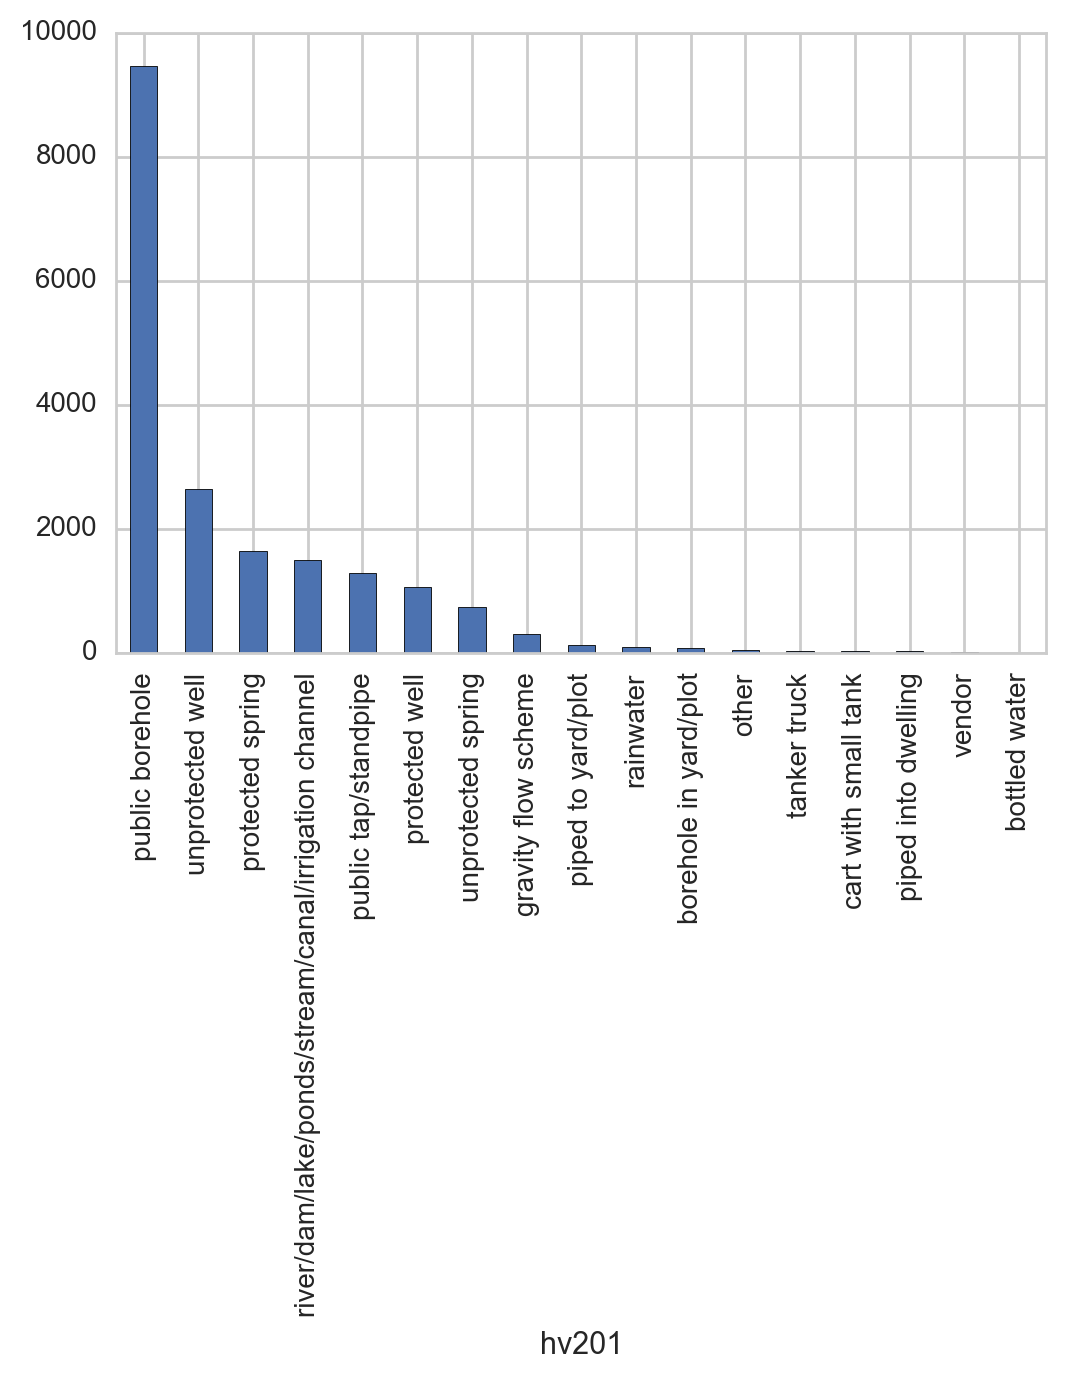

In [456]:
#Common sources of drinking water

#Standing water is a major source of mosquito breeding
#Open latrines are a major breeding ground for mosquitos

rural_uganda.groupby('hv201').size().sort_values(ascending=False).plot(kind='bar')

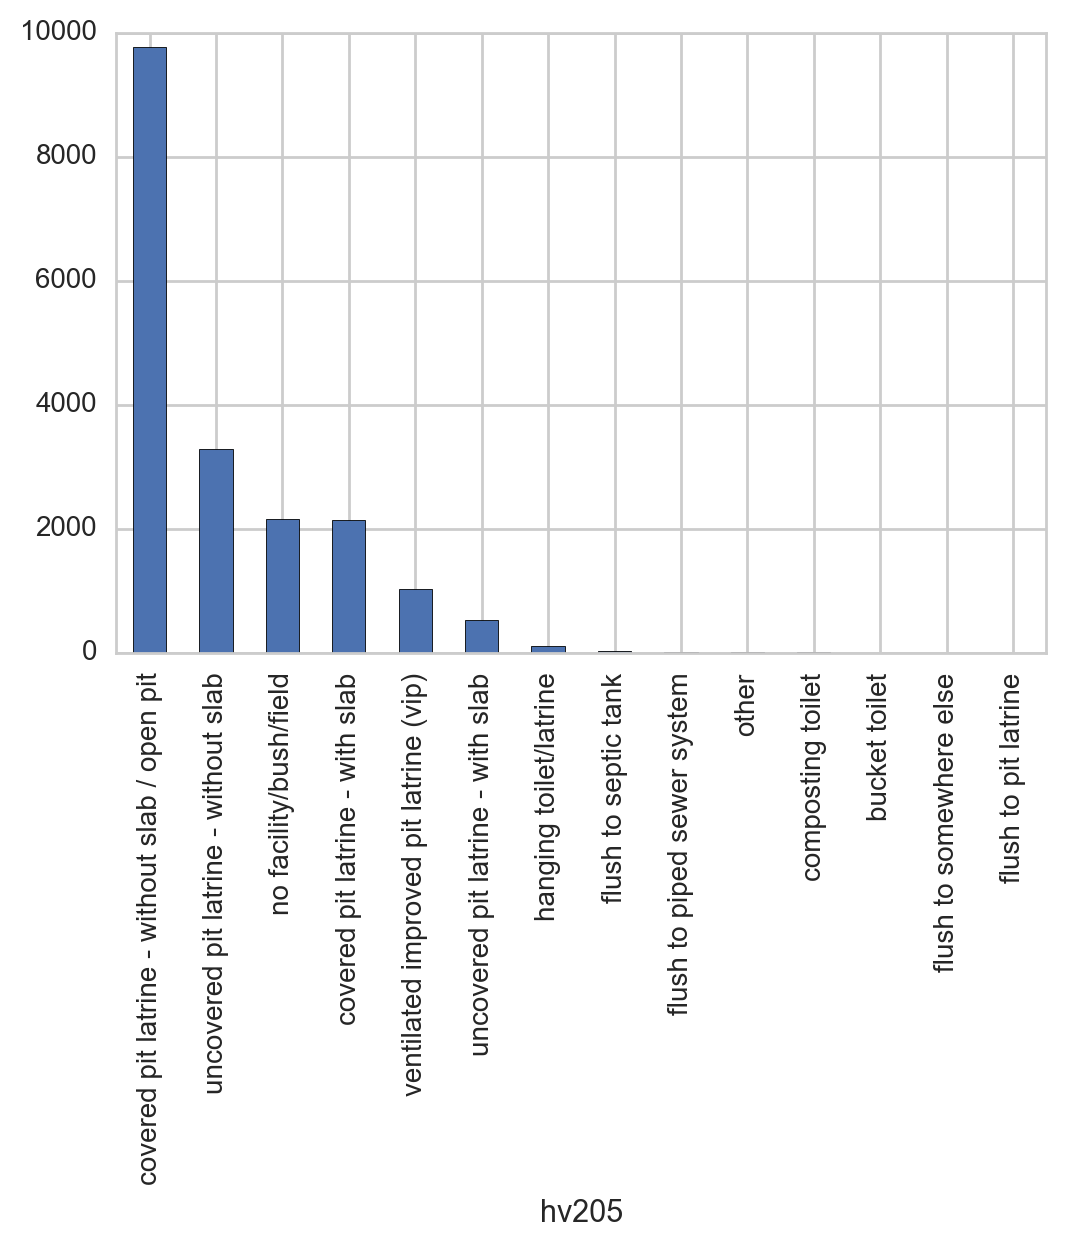

In [457]:
rural_uganda.groupby('hv205').size().sort_values(ascending=False).plot(kind='bar')

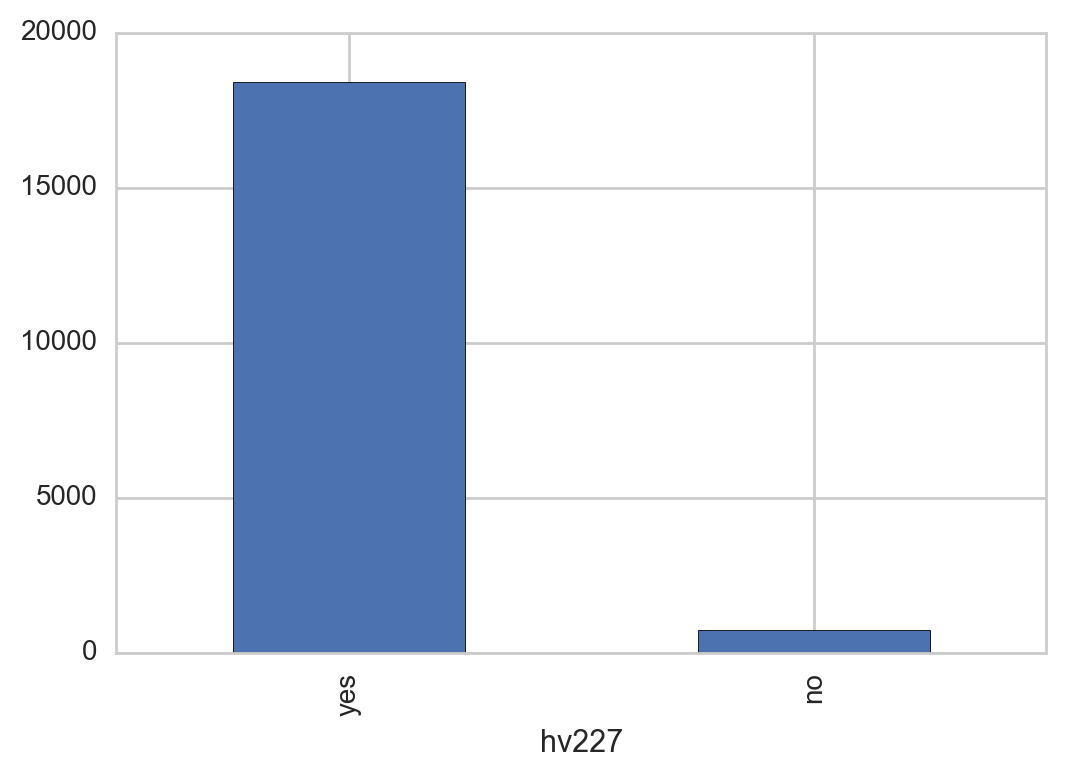

In [458]:
#We can see that most households have a mosquito net

rural_uganda.groupby('hv227').size().sort_values(ascending=False).plot(kind='bar')

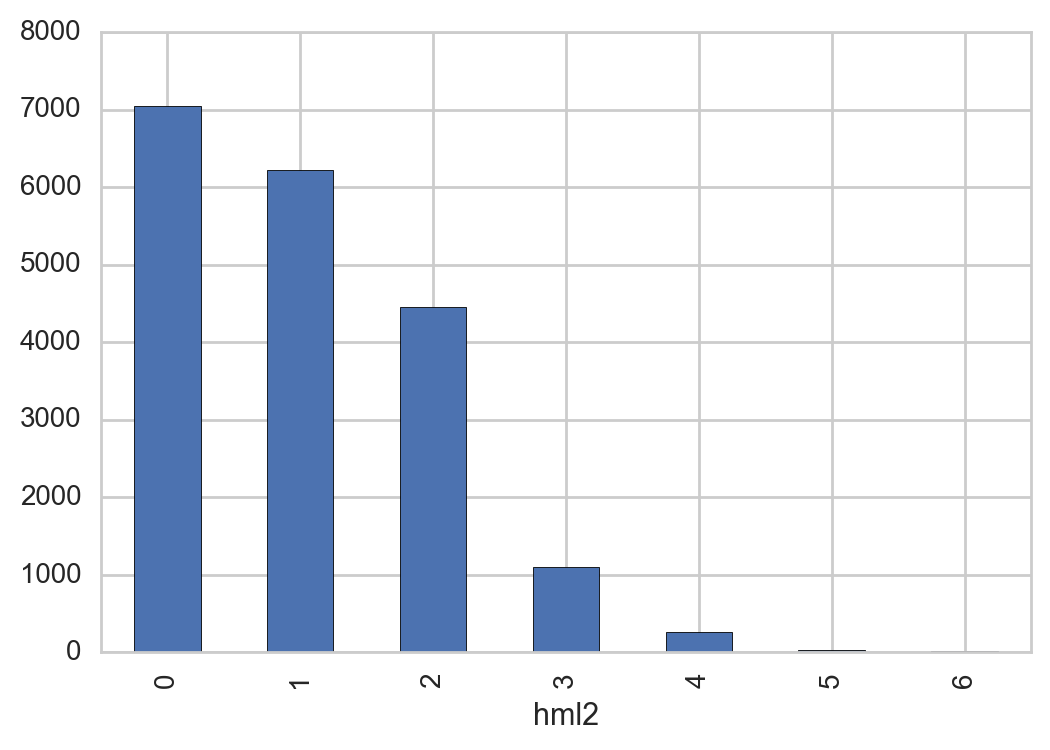

In [459]:
#Number of children that slept under bed net last night

rural_uganda.groupby('hml2').size().sort_values(ascending=False).plot(kind='bar')

In [460]:
#First i will clean all the predictor variables. 

In [461]:
rural_uganda['hv201'].value_counts()

public borehole                                         9465
unprotected well                                        2641
protected spring                                        1638
river/dam/lake/ponds/stream/canal/irrigation channel    1505
public tap/standpipe                                    1290
protected well                                          1062
unprotected spring                                       743
gravity flow scheme                                      312
piped to yard/plot                                       124
rainwater                                                 90
borehole in yard/plot                                     76
other                                                     47
tanker truck                                              35
cart with small tank                                      35
piped into dwelling                                       35
vendor                                                    10
bottled water           

In [462]:
rural_uganda['upr_source']=rural_uganda['hv201'].apply(lambda x: 1 if x =='public borehole' else 1 if x=='unprotected well' else 1 if x=="river/dam/lake/ponds/stream/canal/irrigation channel" else 1 if x=="public tap/standpipe" else 1 if x=="unprotected spring" else 1 if x== "rainwater" else 1 if x=="other" else 1 if x=="cart with small tank" else 0)


/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [463]:
rural_uganda['upr_source'].value_counts()

1    15850
0     3293
Name: upr_source, dtype: int64

In [464]:
rural_uganda['hv205'].value_counts()

covered pit latrine - without slab / open pit    9768
uncovered pit latrine - without slab             3280
no facility/bush/field                           2154
covered pit latrine - with slab                  2136
ventilated improved pit latrine (vip)            1021
uncovered pit latrine - with slab                 521
hanging toilet/latrine                            108
flush to septic tank                               34
flush to piped sewer system                        11
other                                               8
composting toilet                                   7
bucket toilet                                       0
flush to somewhere else                             0
flush to pit latrine                                0
Name: hv205, dtype: int64

In [465]:
rural_uganda['upr_lat']=rural_uganda['hv205'].apply(lambda x: 1 if x =='uncovered pit latrine - without slab' else 1 if x=='no facility/bush/field' else 1 if x=="uncovered pit latrine - with slab" else 0)


/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [466]:
rural_uganda['upr_lat'].value_counts()

0    13188
1     5955
Name: upr_lat, dtype: int64

In [467]:
rural_uganda['hv215'].value_counts()

iron sheets         9522
thatched            9412
asbestos              75
mud                   38
palm                  29
wood                  18
cement                13
roofing shingles      11
tin                    6
cement fiber           4
other                  3
tiles                  0
Name: hv215, dtype: int64

In [468]:
rural_uganda['roof']=rural_uganda['hv215'].apply(lambda x: 1 if x =='iron sheets' else 1 if x=='thatched' else 1 if x=="asbestos" else 0 if x=="mud" else 1 if x=="palm" else 1 if x=="wood" else 1 if x=="roofing shingles" else 1 if x=="cement" else 1 if x=="tiles" else 1 if x=="wood planks" else 1 if x=="tin" else 0 if x=="other" else 1 if x=="cement fiber" else 0)


/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [469]:
rural_uganda['roof'].value_counts()

1    19090
0       53
Name: roof, dtype: int64

In [470]:
rural_uganda['hv214'].value_counts()

mud and poles                  6834
unburnt bricks with mud        3908
burnt bricks with cement       3492
dirt                           2170
cement                         1737
unburnt bricks                  301
other                           153
unburnt bricks with plaster     140
stone with lime/cement           90
cement blocks                    74
stone with mud                   72
thatched/straw                   69
no walls                         20
reused wood                       6
wood planks/shingles              0
Name: hv214, dtype: int64

In [471]:
rural_uganda['wall']=rural_uganda['hv214'].apply(lambda x: 1 if x =='mud and poles' else 1 if x=='unburnt bricks with mud' else 1 if x=="burnt bricks with cement" else 0 if x=="dirt" else 1 if x=="cement" else 1 if x=="unburnt bricks" else 1 if x=="unburnt bricks with plaster" else 0 if x=="other" else 1 if x=="cement blocks" else 1 if x=="stone with mud" else 1 if x=="stone with lime/cement" else 1 if x=="thatched/straw " else 1 if x=="reused wood " else 0 if x=="no walls" else 1 if x=="wood planks/shingles" else 0)


/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [472]:
#rural_uganda['wall']=rural_uganda['hv214'].apply(lambda x: 1 if x ==1 else 1 if x==2 else 1 if x==3 else 0 if x==4 else 1 if x==5 else 1 if x==6 else 1 if x==7 else 0 if x==8 else 1 if x==9 else 1 if x==10 else 1 if x==11 else 1 if x==12 else 1 if x==13 else 0 if x==14 else 1 if x==15 else 0)


In [473]:
rural_uganda['wall'].value_counts()

1    16648
0     2495
Name: wall, dtype: int64

In [474]:
rural_uganda['hv213'].value_counts()

earth/sand               8452
sand and dung            7503
cement                   2931
other                      98
stones                     72
mosaic or tile             39
bricks                     26
wood planks                10
parquet/polished wood       0
Name: hv213, dtype: int64

In [475]:
rural_uganda['floor']=rural_uganda['hv213'].apply(lambda x: 0 if x =='earth/sand' else 0 if x=='sand and dung' else 1 if x=="cement" else 0 if x=="other" else 1 if x=="stones" else 1 if x=="mosaic or tile" else 1 if x=="bricks" else 1 if x=="wood planks" else 1 if x=="parquet/polished wood  " else 0)


/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [476]:
rural_uganda['hv219'].value_counts()

male      14772
female     4371
Name: hv219, dtype: int64

In [477]:
rural_uganda['hv219']=rural_uganda['hv219'].apply(lambda x: 1 if x =='female' else 0 if x=='male' else 0)


/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [478]:
rural_uganda['hv219'].value_counts()

0    14772
1     4371
Name: hv219, dtype: int64

In [479]:
rural_uganda['hv225']= rural_uganda['hv225'].apply(lambda x: 0 if x== 'no' else 1 if x=='yes' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [480]:
rural_uganda['hv225'].value_counts()

0    12309
1     4679
Name: hv225, dtype: int64

In [481]:
rural_uganda['hv227']= rural_uganda['hv227'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else 0)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [482]:
rural_uganda['hv227'].value_counts()

1    18407
0      736
Name: hv227, dtype: int64

In [483]:
rural_uganda['hv246']= rural_uganda['hv246'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else 0)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [484]:
rural_uganda['hv246'].value_counts()

1    14990
0     4092
Name: hv246, dtype: int64

In [485]:
rural_uganda['hv253']= rural_uganda['hv253'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else 0)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [486]:
rural_uganda['hv270'].value_counts()

poorest    6296
poorer     4647
middle     3776
richer     3176
richest    1248
Name: hv270, dtype: int64

In [487]:
rural_uganda['hv270']= rural_uganda['hv270'].apply(lambda x: 1 if x== "poorest" else 1 if x=="poorer" else 1 if x=="middle" else 0 if x=="richer" else 0 if x=="richest" else 0)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [488]:
rural_uganda['sh120b']= rural_uganda['sh120b'].apply(lambda x: 1 if x== "yes" else 0 if x=="no" else 0 if x=="don't know" else 0)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [489]:
rural_uganda['sh120c']= rural_uganda['sh120c'].apply(lambda x: 1 if x== "yes" else 0 if x=="no" else 0 if x=="don't know" else 0)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [490]:
rural_uganda['hml7']= rural_uganda['hml7'].apply(lambda x: 1 if x== "permanet" else 1 if x=="duranet" else 1 if x=="interceptor" else 1 if x=="netprotect" else 1 if x=="olyset" else 1 if x=="dawnet" else 1 if x=="yorkool" else 1 if x=="royal sentry" else 0)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [491]:
rural_uganda['sh218a']= rural_uganda['sh218a'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [492]:
rural_uganda['sh218a'].value_counts()

0    3530
1      48
Name: sh218a, dtype: int64

In [493]:
rural_uganda['sh218b']= rural_uganda['sh218b'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [494]:
rural_uganda['sh218b'].value_counts()

0    3577
1       1
Name: sh218b, dtype: int64

In [495]:
rural_uganda['sh218c']= rural_uganda['sh218c'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [496]:
rural_uganda['sh218d']= rural_uganda['sh218d'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [497]:
rural_uganda['sh218e']= rural_uganda['sh218e'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [498]:
rural_uganda['sh218f']= rural_uganda['sh218f'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [499]:
rural_uganda['sh218g']= rural_uganda['sh218g'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [500]:
rural_uganda['sh218h']= rural_uganda['sh218h'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [501]:
rural_uganda['sh223a']= rural_uganda['sh223a'].apply(lambda x: 1 if x== "0-3 months" else 0 if x=='older' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [502]:
rural_uganda['sh221']= rural_uganda['sh221'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [503]:
#Next, i shall clean the outcome variables i.e. result of the rapid malaria test
rural_uganda['hml35']= rural_uganda['hml35'].apply(lambda x: 1 if x== "positive" else 0 if x=='negative' else 0)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [504]:
rural_uganda['sh214']= rural_uganda['sh214'].apply(lambda x: 1 if x== "measured" else 0 if x=='not present' else 0 if x=='refused' else 0 if x=='other' else 0)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [505]:
#X = rural_uganda[['upr_source','upr_lat','roof','wall', 'floor','hv219','hv225','hv227','hv246a','hv246','hv253','hv270','hml1','hml7','sh120a','sh120b','sh120c','sh218a','sh218b','sh218c','sh218d','sh218e','sh218f','sh218g','sh218h','sh223a','sh221']]
#y = rural_uganda['hml35']

In [506]:
rural_uganda['hml4']= rural_uganda['hml4'].apply(lambda x: 0 if x== "more than 3 years ago " else 0 if x=="don't know" else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [519]:
X = rural_uganda[['upr_source','upr_lat','roof','wall', 'floor', 'hv219','hv227','hv270','hml1','hml2','hml7','shmlweight']]

y = rural_uganda['hml35']
#X = rural_uganda[['upr_source','upr_lat','roof','wall', 'floor', 'hv219','hv225','hv227','hv246','hv253','hv270','hml1','hml2','hml7','sh119a','shmlweight','hml11']]


In [520]:
rural_uganda['sh120b']= rural_uganda['sh120b'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [521]:
rural_uganda['sh120c']= rural_uganda['sh120c'].apply(lambda x: 1 if x== "yes" else 0 if x=='no' else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [522]:
X.isnull().sum()

upr_source    0
upr_lat       0
roof          0
wall          0
floor         0
hv219         0
hv227         0
hv270         0
hml1          0
hml2          0
hml7          0
shmlweight    0
dtype: int64

In [523]:
rural_uganda['hv225'].value_counts()

0    12309
1     4679
Name: hv225, dtype: int64

In [524]:
rural_uganda['sh119a']= rural_uganda['sh119a'].apply(lambda x: 0 if x== "less than one month" else x)

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [525]:
#X['hv225'] = X['hv225'].fillna(np.mean(X['hv225']))

In [526]:
X.isnull().sum()

upr_source    0
upr_lat       0
roof          0
wall          0
floor         0
hv219         0
hv227         0
hv270         0
hml1          0
hml2          0
hml7          0
shmlweight    0
dtype: int64

# PART 2:


## NOTE:
Since we have a mix of household characteristics, in order to see which of those really closely predict the result of malaria we do regularization to see which characteristics predict.

In [527]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize

#use the "fit_transform" function to normalize the X dmatrix
Xn = ss.fit_transform(X)

In [528]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape


(13400, 12) (5743, 12)


(13400,) (5743,)


In [529]:
from sklearn.linear_model import LinearRegression

## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [530]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [531]:
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [532]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 0.06, test data: 0.06
R^2 OLS train data: 0.04, test data: 0.03


In [533]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV


In [534]:
## Find the optimal alpha
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

533.669923121


In [535]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(X_train, y_train)

Ridge(alpha=533.66992312063076, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [536]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)


MSE Ridge train data: 0.06, test data: 0.06
R^2 Ridge train data: 0.04, test data: 0.03


In [537]:
## Find the optimal alpha
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.000660487999201


............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [538]:
best_reg_method(X, ridge)


,abs_coef,coef,variable
9,0.040426,0.040426,hml2
7,0.011068,0.011068,hv270
0,0.010132,0.010132,upr_source
1,0.009208,0.009208,upr_lat
8,0.008309,-0.008309,hml1
5,0.005878,-0.005878,hv219
6,0.004872,-0.004872,hv227
10,0.004405,0.004405,hml7
4,0.001909,-0.001909,floor
11,0.001084,-0.001084,shmlweight


In [539]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(X_train, y_train)

Lasso(alpha=0.00066048799920099361, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [540]:
## Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 0.06, test data: 0.06
R^2 Lasso train data: 0.04, test data: 0.03


In [541]:
## Find the optimal alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.000871497747307
1.0


...................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   16.8s finished


In [542]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(X_train, y_train)

ElasticNet(alpha=0.00087149774730693481, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [543]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)


MSE Elastic Net train data: 0.06, test data: 0.06
R^2 Elastic Net train data: 0.04, test data: 0.03


In [544]:

def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    '''you can change the number inside head to display more or less variables'''
    return method_coefs.head(10)

In [545]:
best_reg_method(X, lasso)


,abs_coef,coef,variable
9,0.041567,0.041567,hml2
7,0.011513,0.011513,hv270
0,0.009938,0.009938,upr_source
1,0.009011,0.009011,upr_lat
8,0.008221,-0.008221,hml1
5,0.005347,-0.005347,hv219
6,0.004424,-0.004424,hv227
10,0.003590,0.003590,hml7
4,0.001197,-0.001197,floor
11,0.000598,-0.000598,shmlweight


In [546]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [547]:
dtr_gs.fit(X_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    6.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [548]:
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 3}


best score 0.0384850519933


In [549]:
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [550]:
feature_importance(X, dtr_best)


,feature,importance
9,hml2,0.621916
10,hml7,0.211126
1,upr_lat,0.112476
7,hv270,0.042585
11,shmlweight,0.011897
0,upr_source,0.000000
2,roof,0.000000
3,wall,0.000000
4,floor,0.000000
5,hv219,0.000000


In [551]:
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 0.00310438,  0.05014626,  0.00310438, ...,  0.00310438,
        0.11912226,  0.00310438])

In [552]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)


MSE Regression tree train data: 0.06, test data: 0.06
R^2 Regression tree train data: 0.04, test data: 0.04


In [553]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot

In [554]:
dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: global name 'dot_parser' is not defined

In [555]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)


In [556]:

## Fit your random forest tree
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   27.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [557]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 3}


best score 0.0423272866926


In [558]:
feature_importance(X, rfr_best)

,feature,importance
9,hml2,0.618012
10,hml7,0.176185
11,shmlweight,0.067757
1,upr_lat,0.063683
7,hv270,0.043461
0,upr_source,0.014976
8,hml1,0.014868
4,floor,0.001058
2,roof,0.000000
3,wall,0.000000


In [559]:
## Predict
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 0.00831362,  0.04506232,  0.00758807, ...,  0.00758807,
        0.11724888,  0.00758807])

In [560]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.06, test data: 0.06
R^2 Random Forest Regression tree train data: 0.05, test data: 0.04


## PART 3: Prediction Accuracy

In [561]:
y = rural_uganda['hml35'] 
exclude_col = ['hml35']



print X.shape, y.shape

(19143, 12) (19143,)


In [562]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(13400, 12) (13400,)
(5743, 12) (5743,)


In [563]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

'''set up parameters for the gridsearch I am using all the posible choices read documentation '''
## http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {
                    "penalty": ['l1','l2'],   
                    # Used to specify the norm used in the penalization.
                    
                    "C": Cs,  
                    # Regularization paramter
                    # "dual":[True, False], # Dual or primal formulation. Dual formulation is only implemented for l2 
                    # penalty with liblinear solver. Prefer dual=False when n_samples > n_features
                    
                    "fit_intercept": [False, True], 
                    # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
                    
                    "class_weight": [None, "balanced"], 
                    # The “balanced” mode uses the values of y to automatically adjust weights inversely 
                    # proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
                    
                    "intercept_scaling": [2, 1], 
                    # Useful only if solver is liblinear. when self.fit_intercept is True, instance vector x becomes 
                    # [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling 
                    # is appended to the instance vector. 
                    
                    "solver":  ['liblinear']
 
}

'''Gridsearch your parameters'''
from sklearn.grid_search import GridSearchCV

## http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
estimator = GridSearchCV(logistic, search_parameters, cv=5, verbose=1, n_jobs=-1)

In [564]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [565]:
log_best = estimator.best_estimator_
print "Best estimators on the left out data:\n", log_best

print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C # This estimator.best_estimator_ object has many great reporting metrics
## Estimator that was chosen by the search, i.e. 
## estimator which gave highest score (or smallest loss if specified) on the left out data. 
## Not available if refit=False.

print "\nBest Params on hold out data (train):\n", estimator.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % estimator.best_score_
## Score of best_estimator on the left out data.

Best estimators on the left out data:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=2, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Best C / Regularization Param on the left out data:
1.0

Best Params on hold out data (train):
{'C': 1.0, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None}

Best Score on left out data:0.930 



In [566]:
print rural_uganda['hml35'].value_counts(), "\n" 
print "If randomly chosen, %.0f percent of the time will be positive for malaria test " % ((np.mean(rural_uganda['hml35']))*100)

0    17805
1     1338
Name: hml35, dtype: int64 

If randomly chosen, 7 percent of the time will be positive for malaria test 


In [567]:
from sklearn.metrics import confusion_matrix

In [568]:
y_pred=estimator.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confmat

array([[5347,    0],
       [ 396,    0]])

In [569]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print "Accuracy score: %.3f" %(acc*100)

Accuracy score: 93.105


In [570]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.93      1.00      0.96      5347
          1       0.00      0.00      0.00       396

avg / total       0.87      0.93      0.90      5743



In [578]:
y_pred=gsdt.predict(X_test)

C = confusion_matrix(y_test, estimator.predict(X_test))
show_confusion_matrix(C, ['Class 0 = No Malaria', 'Class 1 = Malaria'])

NameError: name 'show_confusion_matrix' is not defined

In [575]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7]
         }
    
gsdt = GridSearchCV(dec_tree, params, n_jobs=-1, cv=5, verbose=1)

In [576]:
gsdt.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   12.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [579]:
dec_best = gsdt.best_estimator_
print "Best estimator on the left out data\n", dec_best

dec_par = gsdt.best_params_
print "Best parameters on the left out data\n", gsdt.best_params_

print "Best score on the left out data\n", gsdt.best_score_


Best estimator on the left out data
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Best parameters on the left out data
{'max_features': 'auto', 'min_samples_split': 2, 'max_depth': 20, 'min_samples_leaf': 10}
Best score on the left out data
0.929776119403


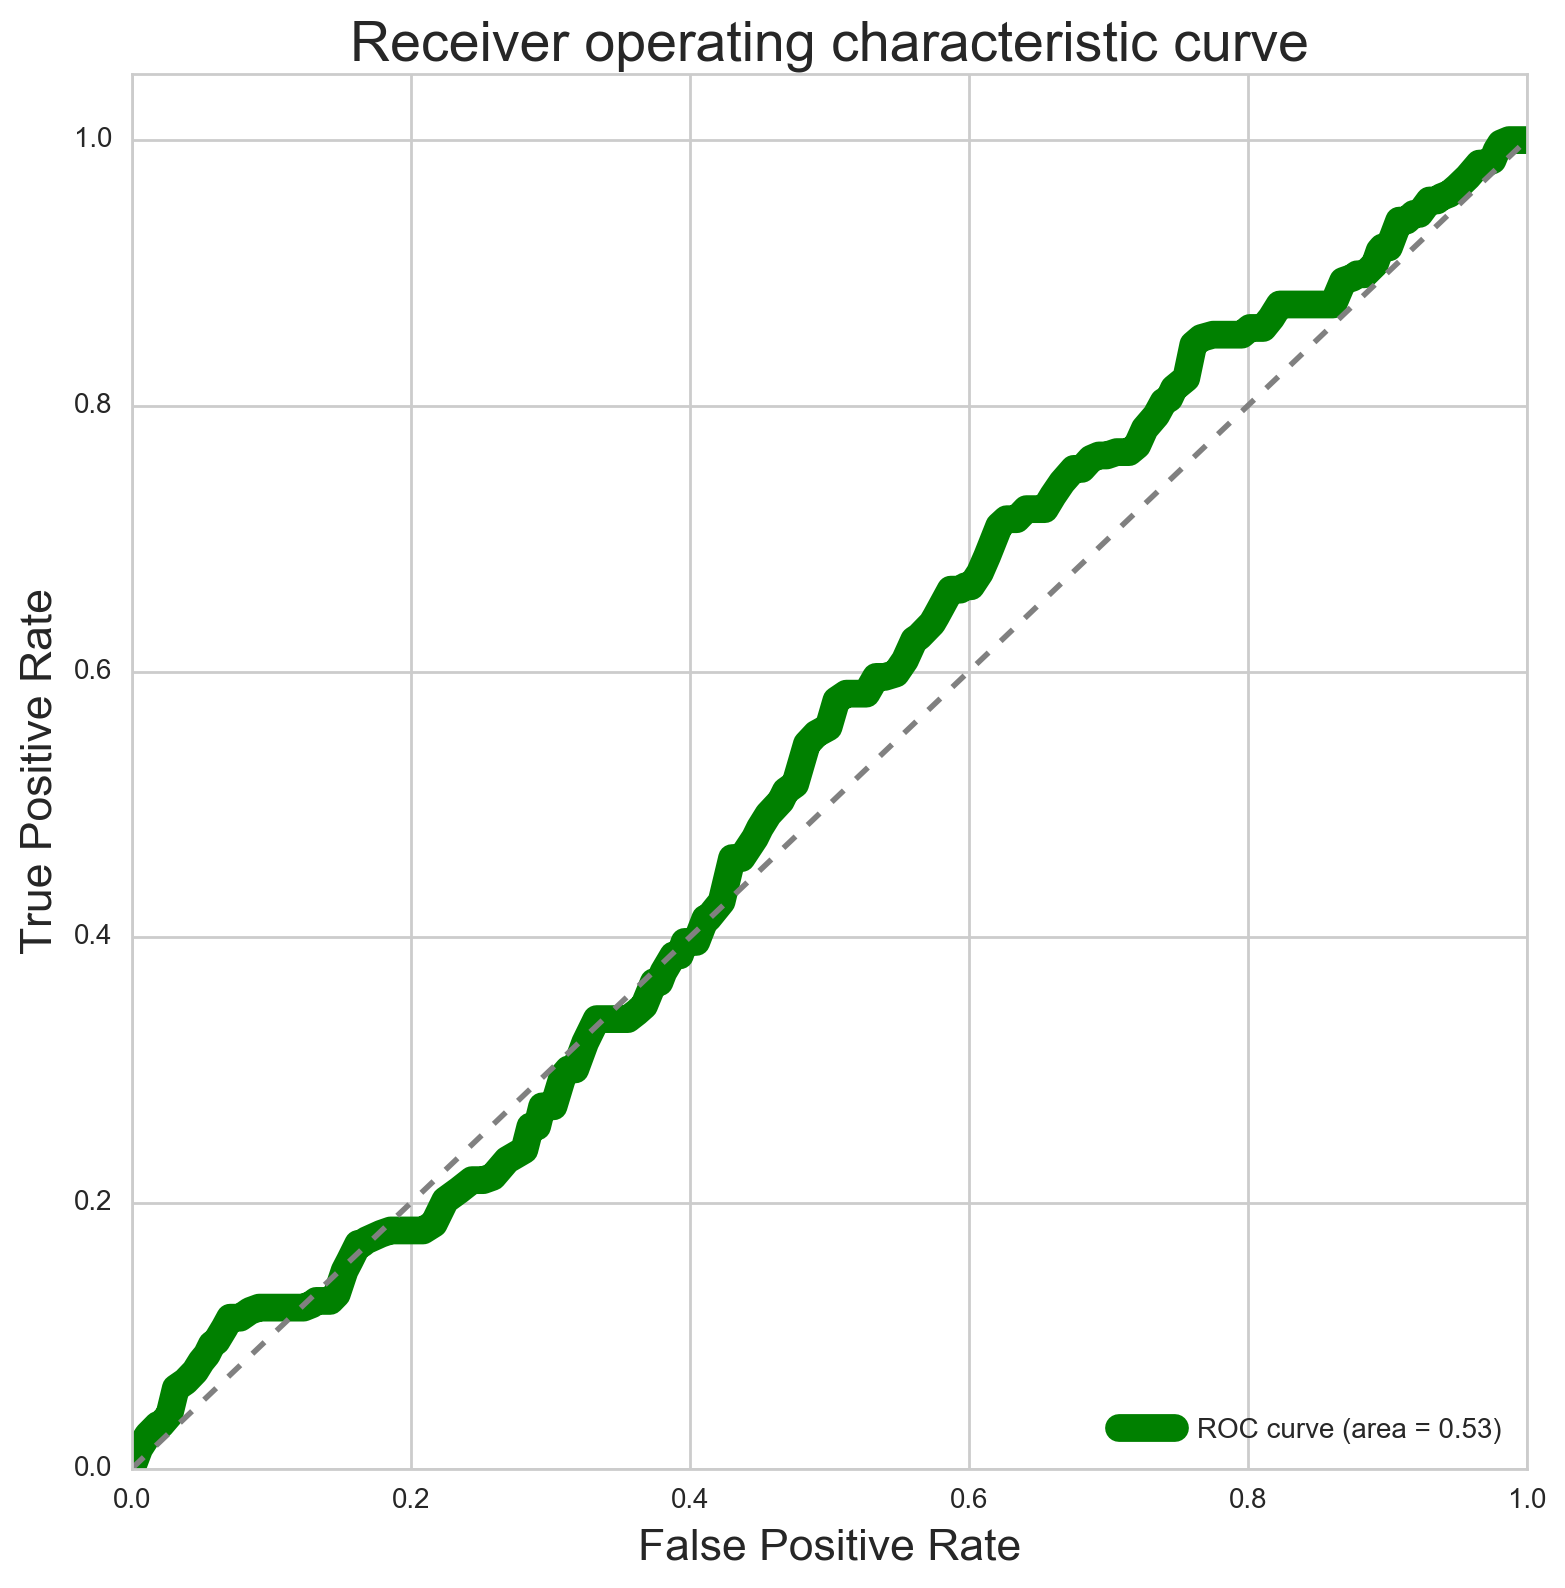

In [573]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = estimator.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# SUMMARY OF THE PROJECT ANALYSIS

## PART 1:
 
 Part 1 involves cleaning the dataset, making dummy variables for categorical variables and defining X and Y.
 I define X as a mix of hh characteristics and Y as the outcome of the rapid malaria test.
 

## PART 2:

#### Regularization:

1. In order to see the best fit variables, i do Lasso, Ridge and Elastic net. 
     These are important for this data analysis because many hh characteristics could covary with one another, like wealth and ownership of cattle, type of walls, floor and roof. 
     

2. When I run Lasso, I see that unprotect source of latrine is the highest predictor of malaria and the type of net slept in last night, which is a proxy most recent type of bed net. Lasso removes the variables which are highly correlated with one another. Which is why presence of community health workers and distribution of medicine by community health worker is ommitted here, it could be highly correlated with ownership of bed nets. 


3. When I run Ridge, I see that current bed net, source of drinking water and source of latrine are the biggest predictor of the malaria. This makes sense intuitively because all these factors are major sources breeding of mosquitos and spreading malaria. For the purpose of this study, using a lasso is more appropriate because: First, both lasso and ridge give similar top predictors, so reducing variance would be a major objective given that the dataset has a lot of observations. Second, since controlling for highly correlated observations does not change the top predictors, Lasso seems like a better option.
        
        
4. When I run random forest and decision tree I find that brand of net, current net, source of drinking water and latrine are the top most predictors. Wealth index also plays a huge role in predicting malaria. Though i would consider this predictor to be extremely endogenous with other factors. I would choose random forest over decision tree for this study because in terms of variables, rfr has more predicting variables which would reduce bias as opposed to decision tree

## PART 3:


One thing to keep in mind is there is a lot of Omitted Variable bias because of climate data. But when we simply look at basic household level characteristics, one is 7% likely to be tested as positive for malaria. The test shows a 93% accuracy rate. That is, even when we look at the score on the left out data, the accuracy score is 93%.